In [ ]:
# Importing Library
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

# Reading the training dataset in a dataframe using Pandas
df = pd.read_csv("HACKATHON/credit_test.csv")

# Reading the test dataset in a dataframe using Pandas
test = pd.read_csv("HACKATHON/credit_train.csv")
df.head


<bound method NDFrame.head of       Loan_ID Gender Dependents     Education Self_Employed  ApplicantIncome  \
0    LP001015   Male          0      Graduate            No             5720   
1    LP001022   Male          1      Graduate            No             3076   
2    LP001031   Male          2      Graduate            No             5000   
3    LP001035   Male          2      Graduate            No             2340   
4    LP001051   Male          0  Not Graduate            No             3276   
..        ...    ...        ...           ...           ...              ...   
362  LP002971   Male         3+  Not Graduate           Yes             4009   
363  LP002975   Male          0      Graduate            No             4158   
364  LP002980   Male          0      Graduate            No             3250   
365  LP002986   Male          0      Graduate            No             5000   
366  LP002989   Male          0      Graduate           Yes             9200   

     Coap

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearnex import patch_sklearn
patch_sklearn()
transformer = ColumnTransformer(
    transformers=[
        ("one_hot_enc_for_location", OneHotEncoder(), [0])
    ],
    remainder="student"
)
data = transformer.fit_transform(data)

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [ ]:
# Store total number of observation in training dataset
df_length =len(df)

# Store total number of columns in testing data set
test_col = len(test.columns)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearnex import patch_sklearn
patch_sklearn()
std_sc = StandardScaler()
df.iloc[:,0:-1] = std_sc.fit_transform(df.iloc[:,0:-1])

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [ ]:
# Summary of numerical variables for training data set

df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [ ]:
# Get the unique values and their frequency of variable Property_Area

df['Location'].value_counts()

Urban        140
Semiurban    116
Rural        111
Name: Location, dtype: int64

<AxesSubplot: >

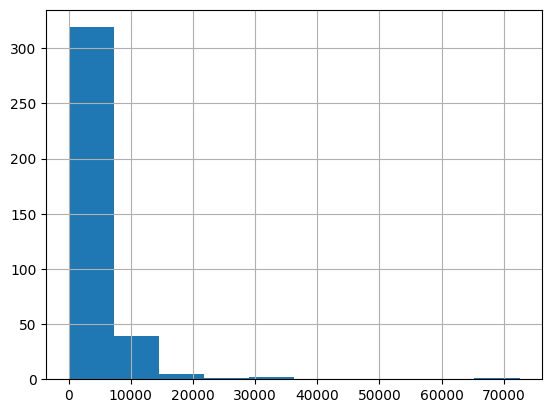

In [ ]:
# Box Plot for understanding the distributions and to observe the outliers.

%matplotlib inline

# Histogram of variable ApplicantIncome

df['ApplicantIncome'].hist()

<AxesSubplot: >

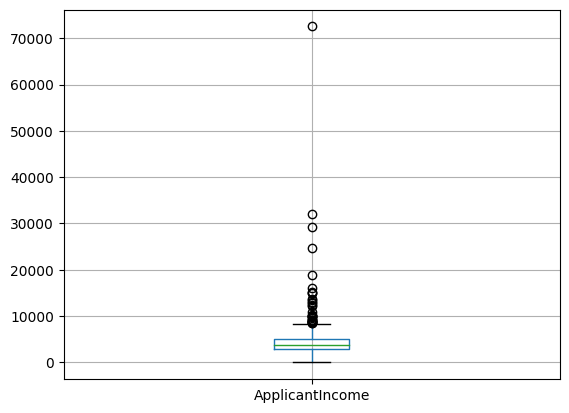

In [ ]:
# Box Plot for variable ApplicantIncome of training data set

df.boxplot(column='ApplicantIncome')

<AxesSubplot: title={'center': 'ApplicantIncome'}, xlabel='Education'>

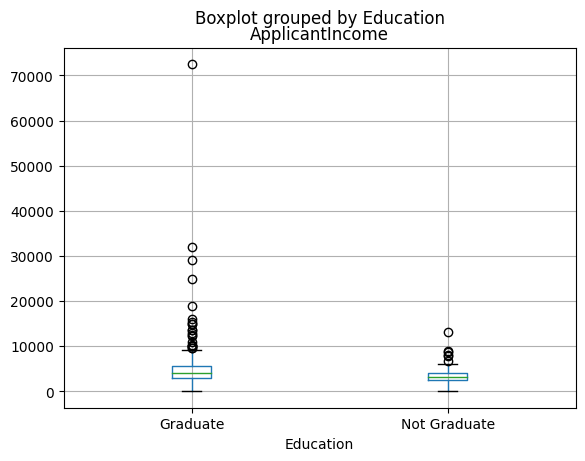

In [ ]:
# Box Plot for variable ApplicantIncome by variable Education of training data set

df.boxplot(column='ApplicantIncome', by = 'Education')

<AxesSubplot: >

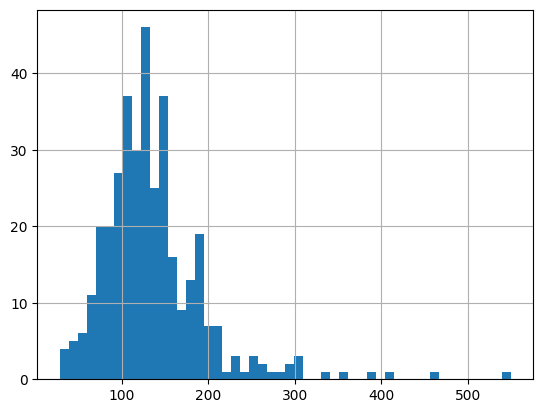

In [ ]:
# Histogram of variable LoanAmount

df['LoanAmount'].hist(bins=50)

<AxesSubplot: >

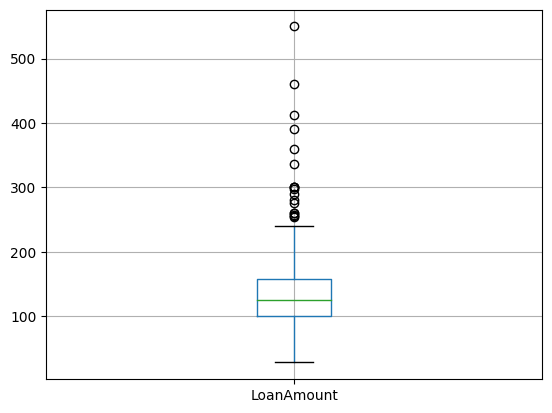

In [ ]:
# Box Plot for variable LoanAmount of training data set

df.boxplot(column='LoanAmount')

<AxesSubplot: title={'center': 'LoanAmount'}, xlabel='Gender'>

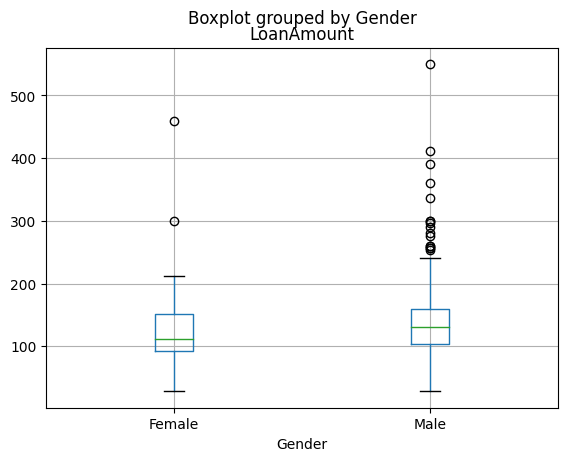

In [ ]:
# Box Plot for variable LoanAmount by variable Gender of training data set

df.boxplot(column='LoanAmount', by = 'Gender')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearnex import patch_sklearn
patch_sklearn()
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=0)

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [ ]:
Understanding Distribution of Categorical Variables:

In [ ]:
# Loan approval rates in absolute numbers
loan_approval = df['Loan_Status'].value_counts()['Y']
print(loan_approval)

KeyError: 'Loan_Status'

In [ ]:
# Credit History and Loan Status
pd.crosstab(df ['Credit_History'], df ['Loan_Status'], margins=True)

KeyError: 'Loan_Status'

In [ ]:
# Add both ApplicantIncome and CoapplicantIncome to TotalIncome
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']

# Looking at the distribtion of TotalIncome
df['LoanAmount'].hist(bins=20)

In [ ]:
# Perform log transformation of TotalIncome to make it closer to normal
df['LoanAmount_log'] = np.log(df['LoanAmount'])

# Looking at the distribtion of TotalIncome_log
df['LoanAmount_log'].hist(bins=20)

In [ ]:
# Impute missing values for Gender
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)



# Impute missing values for Dependents
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)

# Impute missing values for Credit_History
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)

# Convert all non-numeric values to number
cat=['Gender','Dependents','Education','Self_Employed','Credit_History','Location']

for var in cat:
    le = preprocessing.LabelEncoder()
    df[var]=le.fit_transform(df[var].astype('str'))
df.dtypes